In [1]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [33]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'training_set'
valid_path = 'test_set'

# add preprocessing layer to the front of VGG
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
# don't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [35]:
# useful for getting number of classes
folders = glob('Training_set/*')

In [36]:
len(folders)

2

In [37]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [38]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [39]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 202 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [43]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
13/13 [==============================] - 57s 4s/step - loss: 1.6765 - accuracy: 0.5495 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 60s 5s/step - loss: 0.4081 - accuracy: 0.7772 - val_loss: 0.0736 - val_accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 59s 5s/step - loss: 0.2581 - accuracy: 0.8663 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 60s 5s/step - loss: 0.1911 - accuracy: 0.9257 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 59s 5s/step - loss: 0.1632 - accuracy: 0.9307 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 62s 5s/step - loss: 0.1319 - accuracy: 0.9703 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 63s 5s/step - loss: 0.0761 - accuracy: 0.9901 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 8/20
13/13 [==

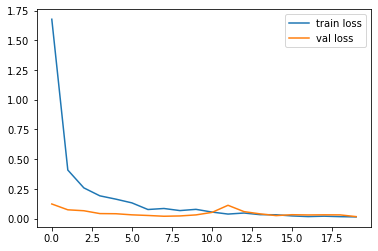

<Figure size 432x288 with 0 Axes>

In [44]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


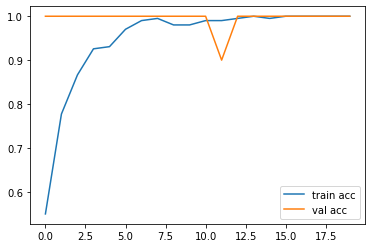

<Figure size 432x288 with 0 Axes>

In [46]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
model.save('facedetectionintelligence_model.h5')

In [50]:
# Part 3 - Making new predictions
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'D:\Project\test_set\cats\cat.105.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# load model
model = load_model('facedetectionintelligence_model.h5')
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'cat'
    print(prediction)
else:
    prediction = 'dog'
    print(prediction)

cat
